# Problem Set 3. Neural Networks.

## Problem 1
In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

### Packages

Import all the packages that you will need during this assignment.

In [115]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Dataset
You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [116]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [117]:
# load dataset
X, y = load_data()

### Inspect the data
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`. 

In [118]:
print ('The first element of X is: ', X[0,0])

The first element of X is:  0.0


In [119]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


### Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [120]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

### Visualize your data
You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

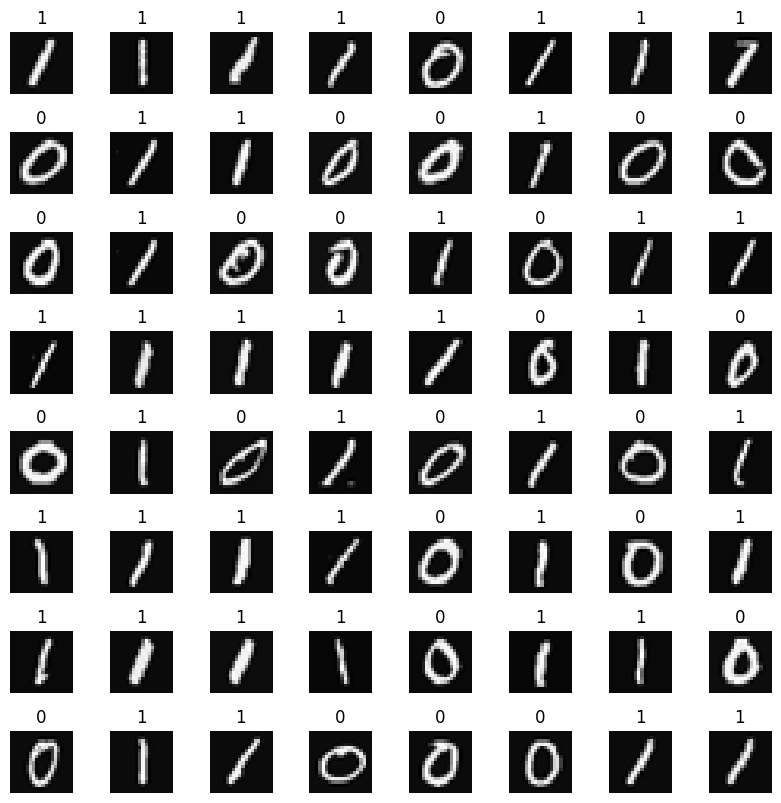

In [121]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

### Model representation

The neural network you will use in this assignment has three dense layers with sigmoid activations.
- Recall that our inputs are pixel values of digit images.
- Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

- The parameters have dimensions that are sized for a neural network with 25 units in layer 1, 15 units in layer 2, and 1 output unit in layer 3.

- Recall that the dimensions of these parameters are determined as follows:
    - If the network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then:
        - $W$ will be of dimension $s_{in} \times s_{out}$.
        - $b$ will be a vector with $s_{out}$ elements.
  
- Therefore, the shapes of $W$ and $b$ are:
    - Layer 1: The shape of $W1$ is $(400, 25)$ and the shape of $b1$ is $(25,)$
    - Layer 2: The shape of $W2$ is $(25, 15)$ and the shape of $b2$ is $(15,)$
    - Layer 3: The shape of $W3$ is $(15, 1)$ and the shape of $b3$ is $(1,)$

> **Note:** The bias vector $b$ could be represented as a 1-D $(n,)$ or 2-D $(1,n)$ array. TensorFlow utilizes a 1-D representation, and this lab will maintain that convention.

               

### Tensorflow Model Implementation

Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 

> **Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
> `tf.keras.Input(shape=(400,)),    #specify input shape`  
> We will include that here to illuminate some model sizing.


### Exercise 1

Below, use Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

In [122]:

tf.get_logger().setLevel('ERROR')

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            

In [123]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output </b></font></summary>
The `model.summary()` function displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown. Note, the names of the layers may vary as they are auto-generated.  
    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
=================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [124]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


We can examine details of the model by first extracting the layers with `model.layers` and then extracting the weights with `layerx.get_weights()` as shown below.

In [125]:
[layer1, layer2, layer3] = model.layers

In [126]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (1,)
```

`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [127]:
tf.get_logger().setLevel('ERROR')

print(model.layers[2].weights)

[<Variable path=my_model/dense_23/kernel, shape=(15, 1), dtype=float32, value=[[ 0.44537002]
 [-0.33712223]
 [-0.6115861 ]
 [-0.32099292]
 [ 0.19591081]
 [ 0.49898463]
 [ 0.5268442 ]
 [-0.21027789]
 [-0.00446969]
 [ 0.53749305]
 [-0.25736833]
 [ 0.24480593]
 [-0.44060436]
 [ 0.5555994 ]
 [ 0.09655946]]>, <Variable path=my_model/dense_23/bias, shape=(1,), dtype=float32, value=[0.]>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [128]:
tf.get_logger().setLevel('ERROR')

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.6408
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.4852
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.3258
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 0.2128
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.1491
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.1159
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.0885
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.0696
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.0586
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.0500
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.0441
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.0435
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.0337
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0310
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - lo

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.

In [129]:

prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
 predicting a zero: [[0.0161519]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
 predicting a one:  [[0.9881243]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [130]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

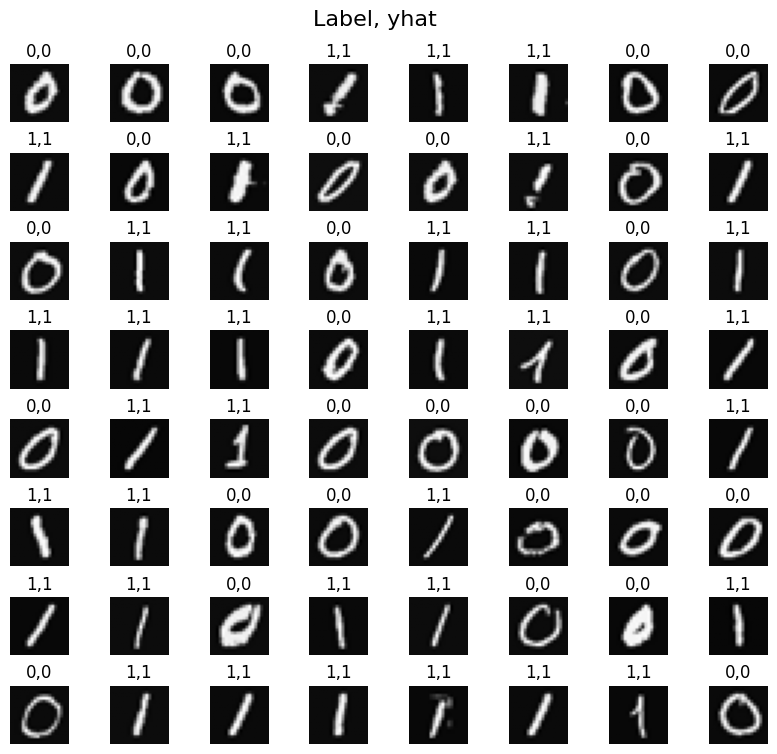

In [131]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

## Problem 2

Train a Neural Network model with simulated data. 

The objective of this assignment is to provide students with hands-on experience in building and training neural networks using simulated data. Students will learn how to generate synthetic data, split it into training and test sets, construct and train neural networks, and evaluate their performance. They will explore the effects of different activation functions and the number of layers on the model's accuracy, helping them understand the impact of various neural network configurations on performance.

### Exercise 2
Train a Neural Network model with simulated data. 

#### Packages


In [132]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

#### Dataset

Simulate your own classification data. The sample should contain 500 observations, 3 features (2 informative and one redundant) and a binary output (i.e. a two classes output which represents respectively 30% and 70% of the sample)

In [133]:
X, y = make_classification(n_samples=500, n_features=3, n_informative=2, n_redundant=1, 
                           n_classes=2, weights=[0.3, 0.7], random_state=42)

# Split the dataset into training and test sets


##### Split the dataset into training and test sets

In [159]:
### START CODE HERE ### 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### END CODE HERE ### 

# Convert to DataFrame for better visualization
data_train = pd.DataFrame(X_train, columns=['Feature1', 'Feature2', 'Feature3'])
data_train['Target'] = y_train

data_test = pd.DataFrame(X_test, columns=['Feature1', 'Feature2', 'Feature3'])
data_test['Target'] = y_test


#### Inspect

In [160]:
# Display the first few rows of the training dataset
print("Training Data:")
print(data_train.head())

# Display the first few rows of the test dataset
print("\nTest Data:")
print(data_test.head())

Training Data:
   Feature1  Feature2  Feature3  Target
0  1.224229  1.928054  0.007296       1
1 -0.488432 -1.169503  2.665655       1
2 -0.101485 -0.127950 -0.213148       0
3  0.651962  1.767548 -4.934780       1
4  0.402180  0.900841 -1.780637       1

Test Data:
   Feature1  Feature2  Feature3  Target
0  0.960525  1.317761  1.305671       1
1  0.207378  0.407216 -0.536216       1
2  1.238677  1.996192 -0.295187       1
3  1.100906  1.683593  0.341497       1
4 -0.664880 -0.911504 -0.908167       0


#### Define the model
Write a program to fit a single hidden layer neural network with ten hidden units.

In [161]:
model = Sequential([
    ### START CODE HERE ###
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid')
    ### END CODE HERE ### 
])

In [162]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


#### Train the model

In [163]:
tf.get_logger().setLevel('ERROR')

history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2748 - loss: 0.8797  
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2871 - loss: 0.8422 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2995 - loss: 0.8015 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3194 - loss: 0.7649 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3451 - loss: 0.7384 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4828 - loss: 0.7075 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.6823 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - loss: 0.6664 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7074 - loss: 0.6498 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7755 - loss: 0.6315 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7841 - loss: 0.6218 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

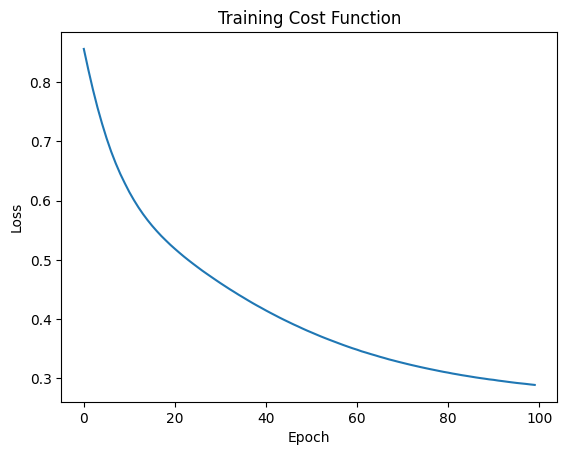

In [164]:
# Plot the training loss over iterations
plt.plot(history.history['loss'])
plt.title('Training Cost Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Evaluate the Model
Evaluate the neural network on the test set.
Report the training and test accuracy.

In [165]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8767 - loss: 0.2934 
Training Accuracy: 0.8950
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9531 - loss: 0.2017
Test Accuracy: 0.9400


### Exercise 2

Explore and Experiment with Different Neural Network Configurations

The objective of this exercise is to understand how various changes to the neural network architecture and hyperparameters affect the model's performance. You will experiment with different network structures, activation functions, regularization terms, number of epochs, and batch sizes to determine the optimal configuration for the dataset.

1. Try Different Structures of the Neural Network
   - Experiment with adding more layers (e.g., 1, 2, 3 layers).
   - Change the number of neurons in each layer (e.g., 10, 20, 50 neurons).
2. Experiment with Different Activation Functions
   - Use different activation functions such as `'relu'`, `'sigmoid'`, and `'tanh'` in your neural network layers.

3. Try Different Regularization Terms
   - Apply different regularization techniques such as L1 and L2 regularization.
   - Experiment with different regularization strengths (e.g., 0.01, 0.1, 0.5).

4. Change Number of Epochs and Batch Size
   - Vary the number of training epochs (e.g., 50, 100, 200 epochs).
   - Change the batch size used during training (e.g., 16, 32, 64).


5. Report on Model Performance
   - Train and evaluate the neural network with each configuration.
   - Report the training and test accuracy for each modification.
   - Analyze how each modification affects the model's accuracy and discuss the results.
   - Determine and justify the preferred neural network model based on the experiments.

In [166]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    X = X[0:1000]
    y = y[0:1000]
